In [1]:
import sys
#sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
print ( sys.path )

import os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#import mplhep
from matplotlib.colors import LogNorm
import joblib
from joblib import dump, load

print ( "numpy: {}".format(np.__version__) )
print ( "joblib: {}".format(joblib.__version__) )

import sklearn
import tensorflow as tf
from tensorflow import keras

print ( "sklearn: {}".format(sklearn.__version__) )
print ( "tensorflow: {}".format(tf.__version__) )

['/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python38.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/extensions', '/scratch/antoniov/.ipython']
numpy: 1.18.2
joblib: 0.14.0
sklearn: 0.23.2
tensorflow: 2.3.1


In [2]:
# get_data, process_data, fiducial_cuts, fiducial_cuts_all, aperture_parametrisation, check_aperture
from processing import *

#proton_selection = "SingleRP"
proton_selection = "MultiRP"

#data_periods = [ "2017B", "2017C1", "2017C2", "2017D", "2017E", "2017F1", "2017F2", "2017F3" ]
data_periods = [ "2017B", "2017C1", "2017E", "2017F1" ]

run_tables = False

run_random_experiments = False

use_keras = True

scaler_path = None
model_path = None
if use_keras:
#     scaler_path = "model/standard_scaler.joblib"
#     model_path = "model/keras_model.h5"
#     scaler_path = "model/standard_scaler_test-multiRP_2021_03_21-21_09_11.joblib"
#     model_path = "model/keras_model_test-multiRP_2021_03_21-23_42_07.h5"
    scaler_path = "model/standard_scaler_test-multiRP_2021_04_12-23_24_09.joblib"
    model_path = "model/keras_model_test-multiRP_2021_04_13-01_34_15.h5"
else:
    model_path = "model/ada_clf.joblib"

## Signal

In [3]:
label = "Elastic"

fileNames_signal = [
    'output/output-MC2017-Elastic-Non3+3-PreSel.h5',
    #'output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_signal, df_signal = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_signal_, df_signal_ = get_data( fileNames_signal )
        df_signal_ = process_data( df_signal_, proton_selection, min_mass = 110. )
        
        store_[ "counts" ] = df_counts_signal_
        store_[ "df" ] = df_signal_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_signal = store_[ "counts" ]
    df_signal = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:26:52
Total time elapsed: 0


In [4]:
df_signal

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,xlow,xhigh,ylow,yhigh
3,1,1,3,0,150.0,1,1,103,123,7.630859,...,251.395355,16,0.000880,0.004588,0.081510,0.081510,2.422,24.620,-9.698,4.698
6,1,1,12,0,150.0,1,0,3,23,5.149414,...,126.690613,4,0.001160,0.055618,0.001708,0.055618,1.995,24.334,-10.098,4.298
16,1,1,17,0,150.0,1,1,103,123,3.828247,...,263.130524,1,0.000028,0.008177,0.050104,0.050104,2.422,24.620,-9.698,4.698
19,1,1,30,0,150.0,1,0,3,23,5.139893,...,176.417725,1,0.001032,0.046055,0.003999,0.046055,1.995,24.334,-10.098,4.298
24,1,1,13,0,150.0,1,1,103,123,2.742798,...,233.975662,17,0.000317,0.007711,0.042010,0.042010,2.422,24.620,-9.698,4.698
27,1,1,31,0,150.0,1,1,103,123,5.258789,...,266.681091,0,0.001807,0.006805,0.061971,0.061971,2.422,24.620,-9.698,4.698
30,1,1,37,0,150.0,1,0,3,23,4.975342,...,176.964508,0,0.000757,0.054292,0.003414,0.054292,1.995,24.334,-10.098,4.298
42,1,1,52,0,150.0,1,0,3,23,7.566895,...,1466.510620,2,0.000317,0.072588,0.175365,0.072588,1.995,24.334,-10.098,4.298
43,1,1,52,0,150.0,1,1,103,123,11.388184,...,1466.510620,2,0.000317,0.072588,0.175365,0.175365,2.422,24.620,-9.698,4.698
46,1,1,57,0,150.0,1,1,103,123,3.813232,...,115.234695,0,0.000651,0.001538,0.051120,0.051120,2.422,24.620,-9.698,4.698


In [5]:
L_B  = 2.360904801;
L_C1 = 5.313012839;
L_E  = 8.958810514;
L_F1 = 1.708478656;
lumi_periods = {}
lumi_periods[ "2017B" ]  = L_B
lumi_periods[ "2017C1" ] = L_C1
lumi_periods[ "2017E" ]  = L_E
lumi_periods[ "2017F1" ] = L_F1
print ( lumi_periods )
lumi_total = np.sum( list( lumi_periods.values() ) )
print ( "Total luminosity = {}".format( lumi_total ) )

{'2017B': 2.360904801, '2017C1': 5.313012839, '2017E': 8.958810514, '2017F1': 1.708478656}
Total luminosity = 18.34120681


In [6]:
if run_random_experiments:
    from random_experiment import *
    
    np.random.seed( 42 )

    # per period, arm
    systematics = {}
    #systematics[ "Xi" ] = ( systematics_Xi_X, systematics_Xi_Y )
    #systematics[ "Xi" ] = get_systematics_vs_xi_ROOT( data_periods, fileName="reco_characteristics/reco_characteristics_version1.root" )
    systematics[ "Xi" ] = get_systematics_vs_xi_h5( data_periods, fileName="reco_characteristics/reco_characteristics_version1.h5" )
   
    print ( systematics )
    
    random_experiment( df_signal, data_periods=data_periods, lumi_weights=lumi_periods, variables=[ "Xi" ], variations=systematics )

In [7]:
if run_random_experiments:
    print ( df_signal[ [ "Run", "LumiSection", "EventNum", "Arm", "Xi", "period_rnd", "sigma_Xi", "Xi_smeared"] ] )

## Background

In [8]:
resample_factor = 20
label = "data_random_resample_20"

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_0.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_1.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_bkg = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_bkg_list_ = []
        df_bkg_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_bkg_ = get_data( [ file_ ] )
            df_bkg_ = process_data( df_bkg_, proton_selection, min_mass = 110., within_aperture=True )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_bkg_list_.append( df_bkg_ )

        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[idx_] )

        df_bkg_ = pd.concat( df_bkg_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "df" ] = df_bkg_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_bkg = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:26:53
Total time elapsed: 1


In [9]:
df_counts_bkg

All           869119560
Muon            8456020
Vertex          7782360
ProtonsRnd      6301680
dtype: int64

In [10]:
df_bkg

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh
10,297227,56,38791640,0,120.0,1,0,3,23,7.063232,...,0.058782,0.002211,0.062855,0.002211,2017B,True,1.995,24.334,-10.098,4.298
20,297227,58,40362008,0,120.0,1,0,3,23,7.391113,...,0.271141,0.028539,0.011619,0.028539,2017B,True,1.995,24.334,-10.098,4.298
33,297227,60,41478176,0,120.0,1,0,3,23,6.782959,...,0.157789,0.035037,0.018197,0.035037,2017B,True,1.995,24.334,-10.098,4.298
47,297227,63,44189296,0,120.0,1,0,3,23,13.382812,...,0.008506,0.033806,0.010684,0.033806,2017B,True,1.995,24.334,-10.098,4.298
69,297227,73,52238048,0,120.0,1,1,103,123,8.629883,...,0.060892,0.014483,0.008333,0.008333,2017B,True,2.422,24.620,-9.698,4.698
84,297227,75,53449356,0,120.0,1,1,103,123,5.546875,...,0.023202,0.019344,0.007848,0.007848,2017B,True,2.422,24.620,-9.698,4.698
93,297227,76,54126336,0,120.0,1,0,3,23,8.200684,...,0.145185,0.049092,0.006129,0.049092,2017B,True,1.995,24.334,-10.098,4.298
111,297227,78,55898044,0,120.0,1,1,103,123,3.611084,...,0.273834,0.032531,0.003312,0.003312,2017B,True,2.422,24.620,-9.698,4.698
118,297227,79,56863080,0,120.0,1,1,103,123,3.396606,...,0.026694,0.001631,0.059633,0.059633,2017B,True,2.422,24.620,-9.698,4.698
138,297227,86,61943160,0,120.0,1,0,3,23,7.637451,...,0.095938,0.016999,0.009692,0.016999,2017B,True,1.995,24.334,-10.098,4.298


### Set aside test sample

In [11]:
from sklearn.model_selection import train_test_split

y_sig_ = np.ones( df_signal.shape[0] )
y_bkg_ = np.zeros( df_bkg.shape[0] )

df_signal_train, df_signal_test, y_sig_train, y_sig_test = train_test_split( df_signal, y_sig_, test_size=0.40, shuffle=True, random_state=12345 )
df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test = train_test_split( df_bkg, y_bkg_, test_size=0.40, shuffle=True, random_state=12345 )

print ( df_signal_train, df_signal_test, y_sig_train, y_sig_test )
print ( df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test )

        Run  LumiSection  EventNum  Slice  CrossingAngle  MultiRP  Arm  RPId1  \
7184      1          764     76394      0          120.0        1    0      3   
134812    1         1698    169732      0          150.0        1    1    103   
198101    1          414     41334      0          130.0        1    1    103   
45399     1         1124    112389      0          130.0        1    1    103   
1743      1           17      1693      0          150.0        1    0      3   
121218    1         1573    157270      0          120.0        1    1    103   
15170     1          841     84012      0          120.0        1    1    103   
37604     1         1049    104823      0          150.0        1    1    103   
210846    1          732     73107      0          150.0        1    0      3   
117203    1         1522    152180      0          120.0        1    1    103   
28055     1          961     96012      0          130.0        1    0      3   
86475     1         1251    

           Run  LumiSection    EventNum  Slice  CrossingAngle  MultiRP  Arm  \
584610  304169          775  1174086912     15          130.0        1    1   
305145  300375           71   110011792     10          140.0        1    0   
665428  297219          184   377924896      4          150.0        1    0   
988550  304209          366   622661056     12          140.0        1    1   
696031  297219          690  1276009216      6          130.0        1    0   
611262  304447         1056  1711461760      8          120.0        1    1   
106992  299481          305   363365184      0          120.0        1    0   
802514  304654          407   657480768      8          130.0        1    1   
391423  300576          119   174375040      8          140.0        1    1   
688733  305045          278   484990912     14          140.0        1    1   
886189  300280          635   846633792      5          140.0        1    0   
691408  305112          628  1070034240      8      

In [12]:
print ( [ arr_.shape[0] for arr_ in ( df_signal_train, df_signal_test, y_sig_train, y_sig_test ) ] )
print ( [ arr_.shape[0] for arr_ in ( df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test ) ] )
print ( df_signal_test.mean() )
# print ( df_bkg_test.mean() )

[28830, 19221, 28830, 19221]
[727796, 485198, 727796, 485198]
Run                       1.000000e+00
LumiSection               1.004417e+03
EventNum                  1.003923e+05
Slice                     0.000000e+00
CrossingAngle             1.335316e+02
MultiRP                   1.000000e+00
Arm                       4.798918e-01
RPId1                     5.098918e+01
RPId2                     7.098918e+01
TrackX1                   5.360522e+00
TrackY1                   8.681382e-01
TrackX2                   5.378507e+00
TrackY2                   9.039768e-01
TrackThX_SingleRP        -9.990000e+02
TrackThY_SingleRP        -9.990000e+02
Track1ThX_MultiRP        -6.571191e-06
Track1ThY_MultiRP         7.334872e-06
Track2ThX_MultiRP        -7.935825e-06
Track2ThY_MultiRP         6.452781e-06
TrackPixShift_SingleRP   -1.000000e+00
Track1PixShift_MultiRP    0.000000e+00
Track2PixShift_MultiRP    0.000000e+00
Xi                        5.838119e-02
T                        -1.802354e-01
Th

### Select variables

In [13]:
X_sig_train = None
X_sig_test = None
if run_random_experiments:
    X_sig_train = df_signal_train[ ['Xi_smeared', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ].rename( columns={ "Xi_smeared": "Xi" } )
    X_sig_test = df_signal_test[ ['Xi_smeared', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ].rename( columns={ "Xi_smeared": "Xi" } )
else:
    X_sig_train = df_signal_train[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
    X_sig_test = df_signal_test[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
    
print ( X_sig_train[:20] )
print ( X_sig_test[:20] )

X_bkg_train = df_bkg_train[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_bkg_test = df_bkg_test[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]

print ( X_bkg_train[:20] )
print ( X_bkg_test[:20] )

X_test = pd.concat( [X_sig_test, X_bkg_test] )
y_test = np.concatenate( [y_sig_test, y_bkg_test] )

              Xi     Muon0Pt     Muon1Pt      InvMass  ExtraPfCands     Acopl  \
7184    0.040329   73.456902   72.462585   178.602219             1  0.000010   
134812  0.039064   77.487175   76.224182   153.753983             2  0.000206   
198101  0.041670   63.803547   62.695671   166.183243             0  0.000691   
45399   0.058295   53.412079   52.910538   126.224342             1  0.000256   
1743    0.043040   53.542686   50.286655   125.001396             0  0.001747   
121218  0.040292   54.416470   54.017834   127.565163             0  0.002157   
15170   0.072571   67.009575   66.574005   138.386398             1  0.000247   
37604   0.065533  122.996933  120.216347   262.177338             0  0.000288   
210846  0.053142   67.908630   67.161713   135.474152             5  0.000149   
117203  0.055398   60.326309   59.703342   166.485199             2  0.000219   
28055   0.079746  128.400131  126.398750   320.476044             0  0.001949   
86475   0.091051  200.346481

In [14]:
scaler = None
clf = None
if use_keras:
    scaler = load( scaler_path )
    print ( scaler )
    clf = keras.models.load_model( model_path )
else:
#     if train_model:
#         from sklearn.tree import DecisionTreeClassifier
#         from sklearn.ensemble import AdaBoostClassifier
    
#         ada_clf = AdaBoostClassifier(
#             DecisionTreeClassifier(
#                 max_depth=4,
#                 min_samples_split=5
#             ),
#             n_estimators = 400,
#             algorithm="SAMME.R",
#             learning_rate = 0.4)
#         ada_clf.fit( X_train, y_train )
#         clf = ada_clf
    
#         if save_model:
#             dump( clf, "model/ada_clf.joblib" )
#     else:
#         clf = load( "model/ada_clf.joblib" )
    clf = load( model_path )

print ( clf )

if use_keras:
    clf.summary()

StandardScaler()


/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0

In [15]:
#features_ = ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu']
#for name, score in zip( features_, clf.feature_importances_ ):
#    print( name, score )

In [16]:
#y_train_scores = clf.decision_function( X_train )
#from sklearn.model_selection import cross_val_score
#y_scores = cross_val_score( clf, X_train, y_train, cv=3, n_jobs=-1)
#print ( y_scores )

### Predict on test set

In [17]:
X_test_scaled = None
y_test_proba = None

if use_keras:
    X_test_scaled = scaler.transform( X_test )
    print( X_test_scaled[:20] )
    y_test_proba = clf.predict( X_test_scaled )
    y_test_proba = y_test_proba.flatten()
else: 
    y_test_proba = clf.predict_proba( X_test )[:,1]

print ( y_test_proba )

[[-0.19145957  4.81970598  7.30144932  7.14378081 -1.54416783 -0.69479906
   1.9468931 ]
 [-1.31817901  1.21596836  2.24309139  2.65839076 -1.13790867 -0.69082485
   0.66315252]
 [-0.86538473 -0.08752699  0.40414876  0.58189595 -1.54416783 -0.69326091
   1.17676878]
 [-0.99504691  0.18281881  0.8329066   0.52220647 -1.67958755 -0.69430443
   0.92366662]
 [-1.0884527  -0.81659505 -0.60745125 -0.73219244 -1.45388801 -0.69053525
   0.83904849]
 [ 0.51213691  0.65647864  1.40049233  0.73598581 -1.40874811 -0.69299708
   2.77293963]
 [-0.95861566 -0.82588181 -0.61585812 -0.63092556 -1.63444764 -0.68764788
   1.02852654]
 [-1.24852095 -0.81574667 -0.60989274 -0.2663237  -1.67958755 -0.68746353
   0.63250368]
 [-0.23385325 -0.71068977 -0.56222143 -0.66888162 -1.67958755 -0.68956031
   1.70678039]
 [-0.29257856 -0.21834586  0.07860944 -0.22106936 -1.67958755 -0.69453158
   1.83528077]
 [-0.90381951  0.44422552  0.9921801   0.60299447 -1.58930773 -0.69148567
   1.14554219]
 [-1.13404363 -0.4335

### Run ROC curve

In [18]:
#print ( y_train_scores[ y_train == 0 ] )
#print ( y_train_scores[ y_train == 1 ] )
#
#fig = plt.figure( figsize=(10,10) )
#range_ = ( y_train_scores.min(), y_train_scores.max() )
#plt.hist( y_train_scores[ y_train == 0 ], color='orange', alpha=0.20, bins=20, range=range_ )
#plt.hist( y_train_scores[ y_train == 1 ], color='skyblue', alpha=0.60, bins=20, range=range_ )

In [19]:
#y_test_proba = clf.predict_proba( X_test )[:,1]

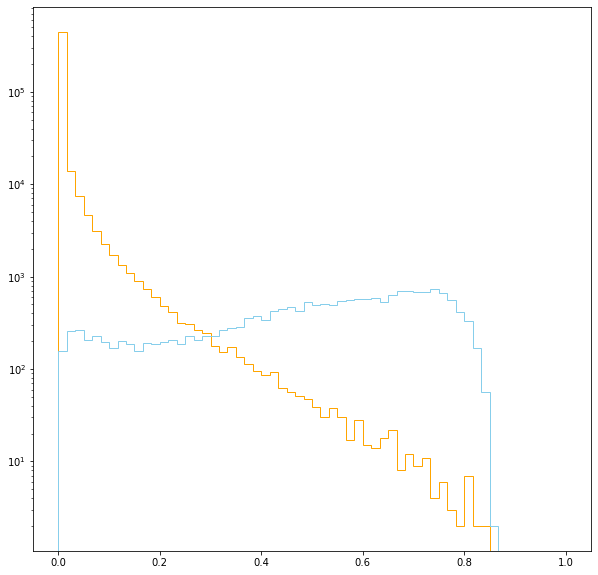

In [20]:
fig = plt.figure( figsize=(10,10) )
plt.hist( y_test_proba[ y_test == 0 ], histtype='step', color='orange', bins=60, range=(0.,1.) )
plt.hist( y_test_proba[ y_test == 1 ], histtype='step', color='skyblue', bins=60, range=(0.,1.) )
plt.yscale('log')

[0.         0.         0.         ... 0.99949093 0.99949505 1.        ] [0.00000000e+00 5.20264294e-05 7.80396441e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [1.8618021e+00 8.6180210e-01 8.4307265e-01 ... 5.9165601e-16 5.8349066e-16
 9.1933500e-20]


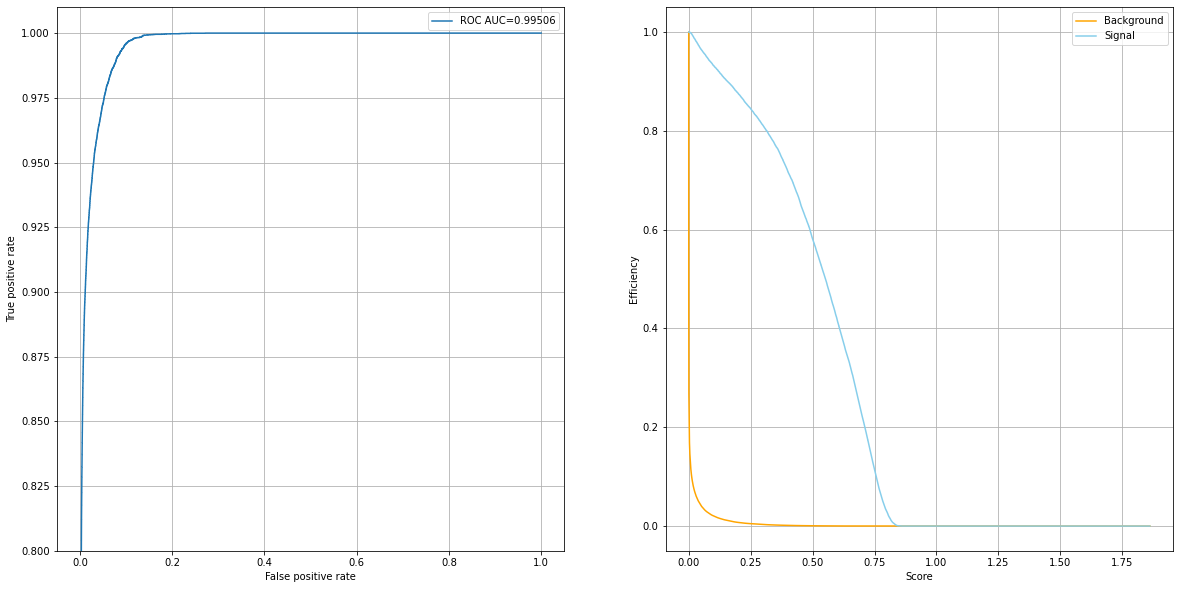

In [21]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve( y_test, y_test_proba )
auc = roc_auc_score(y_test, y_test_proba)

print ( fpr, tpr, thresholds )

fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

axes[0].plot(fpr, tpr, label="ROC AUC={:.5f}".format(auc))
axes[0].legend(loc='best')
axes[0].set_xlabel( 'False positive rate' )
axes[0].set_ylabel( 'True positive rate' )
axes[0].set_ylim(0.80,1.01)
axes[0].grid()

#axes[0].plot(tpr,
#             np.divide(np.ones_like(fpr), fpr, out=np.zeros_like(fpr), where=fpr!=0), 
#             label="ROC AUC={:.5f}".format(auc))
#axes[0].legend(loc='best')
#axes[0].set_ylabel('Background rejection (1/false positive rate)')
#axes[0].set_xlabel('Signal efficiency (true positive rate)')
#axes[0].set_xlim(0.88,1.0)
#axes[0].grid()

axes[1].plot(thresholds,fpr,label='Background', color='orange')
axes[1].plot(thresholds,tpr,label='Signal', color='skyblue')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Efficiency')
axes[1].legend()
axes[1].grid()
#axes[1].set_xscale('log')
#axes[1].set_yscale('log')

0.48927808
[0 0 1 ... 0 0 0]
0.9840707824249285
0.6000208105717705
0.9992848280495797
0.0007151719504202569
$\rm{Prob.} \geq 0.49 \;\rm{-}\; \rm{FPR} = 0.00072 \;\rm{-}\; \rm{TPR} = 0.6000$


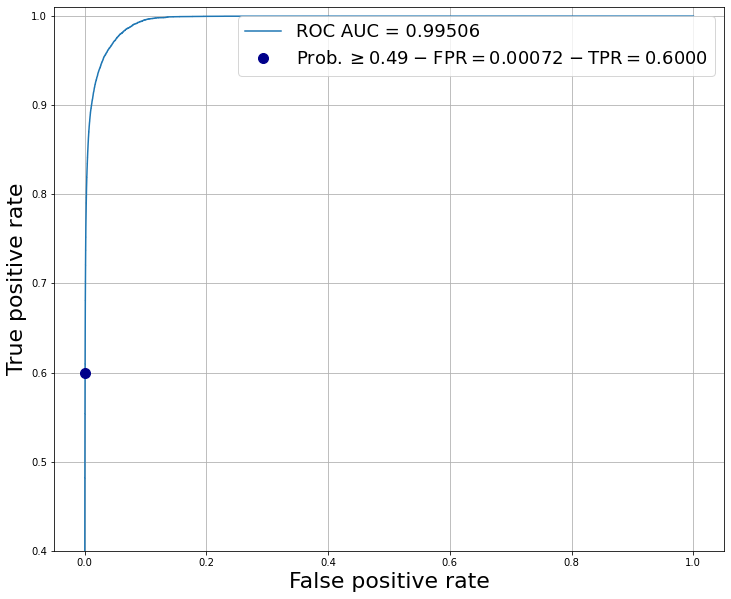

In [22]:
#tpr_target = 0.95
#tpr_target = 0.90
#tpr_target = 0.85
#tpr_target = 0.80
#tpr_target = 0.75
#tpr_target = 0.70
tpr_target = 0.60
prob_cut = thresholds[ np.argmax( tpr >= tpr_target ) ]
#fpr_target = 5.5e-04
#prob_cut = thresholds[ np.argmin( fpr <= fpr_target ) - 1 ]
print( prob_cut )

y_test_pred = None
if use_keras:
    y_test_pred = ( y_test_proba >= prob_cut ).astype( "int32" )
    y_test_pred = y_test_pred.flatten()
else: 
    #y_test_pred = clf.predict( X_test )
    y_test_pred = ( y_test_proba >= prob_cut ).astype( "int32" )
print ( y_test_pred )

from sklearn.metrics import accuracy_score
print ( accuracy_score( y_test, y_test_pred ) )
#tpr_cut = np.sum( ( y_test == 1 ) & ( y_test_pred == 1 ) ) / np.sum( ( y_test == 1 ) )
tpr_cut = accuracy_score( y_test[ y_test == 1 ], y_test_pred[ y_test == 1 ] )
print ( tpr_cut )
#tnr_cut = np.sum( ( y_test == 0 ) & ( y_test_pred == 0 ) ) / np.sum( ( y_test == 0 ) )
tnr_cut = accuracy_score( y_test[ y_test == 0 ], y_test_pred[ y_test == 0 ] )
print ( tnr_cut )
fpr_cut = ( 1. - tnr_cut )
print ( fpr_cut )

fig = plt.figure( figsize=(12,10) )
plt.plot(fpr, tpr, label="ROC AUC = {:.5f}".format(auc))
label_str = "$\\rm{{Prob.}} \geq {:.2f} \;\\rm{{-}}\; \\rm{{FPR}} = {:.5f} \;\\rm{{-}}\; \\rm{{TPR}} = {:.4f}$".format( prob_cut, fpr_cut, tpr_cut )
print ( label_str )
plt.plot( fpr_cut, tpr_cut, marker='o', markersize=10, linestyle='', color='darkblue',
          label=r"{}".format( label_str ) )
plt.legend( loc='best', fontsize=18 )
plt.xlabel( 'False positive rate', fontsize=22 )
plt.ylabel( 'True positive rate', fontsize=22 )
plt.ylim(0.40,1.01)
plt.grid()

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score( y_test, y_test_pred )

0.9840707824249285

(0.0, 0.15)

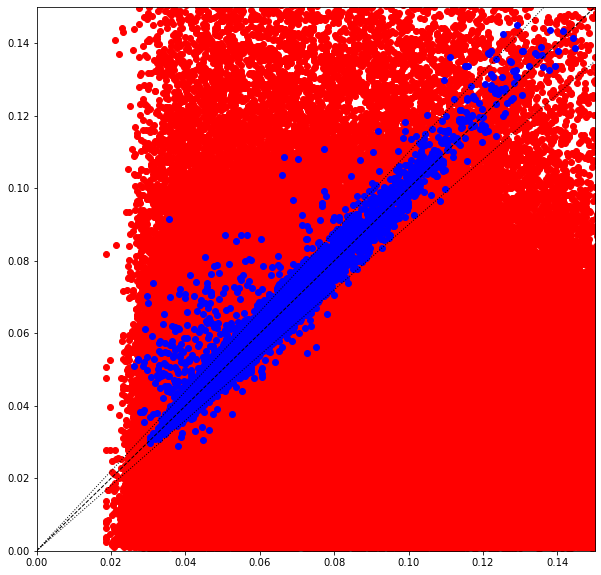

In [24]:
fig= plt.figure( figsize=(10,10) )

msk_bkg = ( y_test_pred == 0 )
msk_sig = ( y_test_pred == 1 )

plt.plot( X_test[ "Xi" ][ msk_bkg ], X_test[ "XiMuMu" ][ msk_bkg ], 'ro' )
plt.plot( X_test[ "Xi" ][ msk_sig ], X_test[ "XiMuMu" ][ msk_sig ], 'bo' )
plt.plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
plt.plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
plt.plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
plt.xlim(0.,0.15)
plt.ylim(0.,0.15)

(array([112.55301505,  93.73324564,  75.1746037 ,  66.4698384 ,
         63.75390428,  57.3123741 ,  57.38204587,  54.1612381 ,
         55.22322317,  53.79560538,  51.25386621,  51.86314188,
         51.14940861,  51.63687744,  53.02958381,  54.16126963,
         49.47802928,  50.92308379,  53.55187124,  50.66188079,
         48.08537476,  49.40839096,  48.95574185,  46.76213464,
         48.83398848,  49.42580054,  49.07760892,  44.48158309,
         41.48703159,  43.92437293,  44.02883042,  40.51218938,
         45.00376696,  43.92437293,  43.83732503,  42.42724775,
         45.03858612,  44.25515497,  43.75037899,  44.44655688,
         40.39032203,  39.65911792,  37.5349693 ,  40.39032203,
         38.98014268,  38.96255162,  34.01840053,  39.10182795,
         38.14448084,  37.88333652]),
 array([0.    , 0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028,
        0.0032, 0.0036, 0.004 , 0.0044, 0.0048, 0.0052, 0.0056, 0.006 ,
        0.0064, 0.0068, 0.0072, 0.0076, 0.008 , 0.

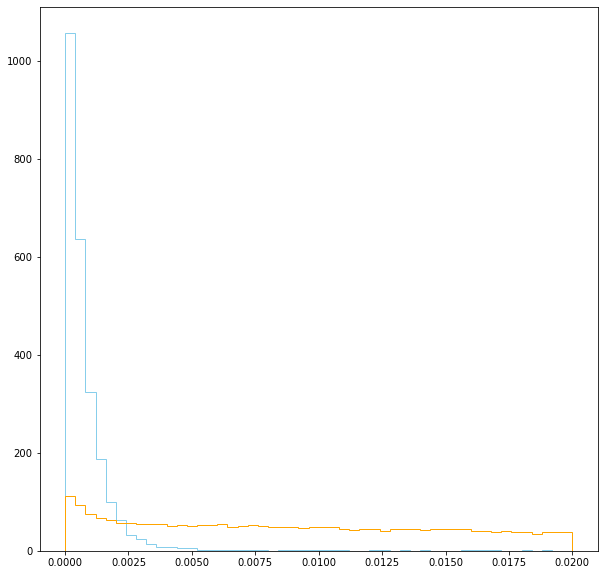

In [25]:
fig = plt.figure( figsize=(10,10) )
plt.hist( X_test[ "Acopl" ][ y_test_pred == 1 ], histtype='step', color='skyblue', bins=50, range=(0.,0.02), density=True )
plt.hist( X_test[ "Acopl" ][ y_test_pred == 0 ], histtype='step', color='orange', bins=50, range=(0.,0.02), density=True )

(array([0.007557  , 0.00625068, 0.00601614, 0.00690793, 0.00809152,
        0.0084706 , 0.00989419, 0.01118414, 0.01231319, 0.01341769,
        0.01384313, 0.01547126, 0.01657576, 0.01763936, 0.0192293 ,
        0.01918294, 0.02021381, 0.02182012, 0.02153649, 0.02321916,
        0.02238191, 0.0239664 , 0.02276644, 0.02533544, 0.02501364,
        0.02485819, 0.02531362, 0.02604178, 0.02578543, 0.02585633,
        0.02654903, 0.02548816, 0.02641813, 0.02561361, 0.02477092,
        0.02451729, 0.02382459, 0.02324097, 0.02408094, 0.02389822,
        0.02339915, 0.02323279, 0.02181466, 0.02206829, 0.02122286,
        0.01991928, 0.01935748, 0.01952929, 0.01854751, 0.03635322]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 [<matplotlib.patches.Polygon

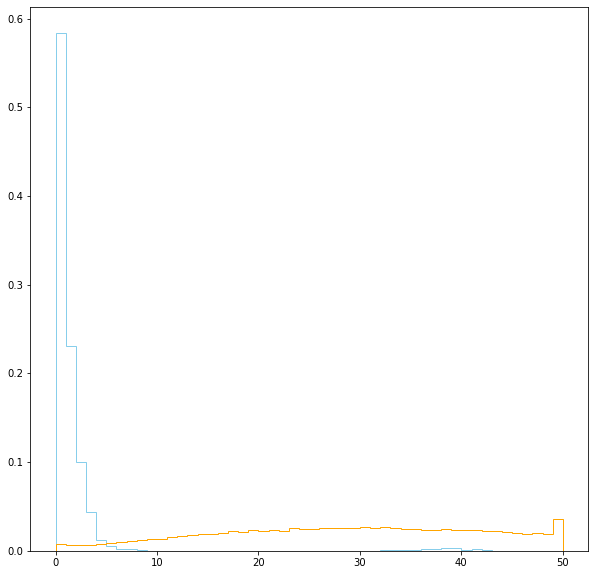

In [26]:
fig = plt.figure( figsize=(10,10) )
plt.hist( X_test[ "ExtraPfCands" ][ y_test_pred == 1 ], histtype='step', color='skyblue', bins=50, range=(0,50), density=True )
plt.hist( X_test[ "ExtraPfCands" ][ y_test_pred == 0 ], histtype='step', color='orange', bins=50, range=(0,50), density=True )

### Inspect signal and background samples

In [27]:
# X_sig_scaled = None
# X_bkg_scaled = None
# y_sig_proba = None
# y_sig_pred = None
# y_bkg_proba = None
# y_bkg_pred = None

# if use_keras:
#     X_sig_scaled = scaler.transform( X_sig )
#     print( X_sig_scaled )
#     X_bkg_scaled = scaler.transform( X_bkg )
#     print( X_bkg_scaled )
    
#     y_sig_proba = clf.predict( X_sig_scaled )
#     y_sig_proba = y_sig_proba.flatten()
#     y_sig_pred = ( y_sig_proba >= prob_cut ).astype( "int32" )
#     y_sig_pred = y_sig_pred.flatten()
    
#     y_bkg_proba = clf.predict( X_bkg_scaled )
#     y_bkg_proba = y_bkg_proba.flatten()
#     y_bkg_pred = ( y_bkg_proba >= prob_cut ).astype( "int32" )
#     y_bkg_pred = y_bkg_pred.flatten()
# else: 
#     y_sig_proba = clf.predict_proba( X_sig )[:,1]
#     #y_sig_pred = clf.predict( X_sig )
#     y_sig_pred = ( y_sig_proba >= prob_cut ).astype( "int32" )
    
#     y_bkg_proba = clf.predict_proba( X_bkg )[:,1]
#     #y_bkg_pred = clf.predict( X_bkg )
#     y_bkg_pred = ( y_bkg_proba >= prob_cut ).astype( "int32" )

# print ( y_sig_proba )
# print ( y_sig_pred )
# print ( y_bkg_proba )
# print ( y_bkg_pred )

# print ( accuracy_score( y_sig, y_sig_pred ) )
# print ( accuracy_score( y_bkg, y_bkg_pred ) )

In [28]:
df_signal_test[ "category" ] = y_test_pred[ y_test == 1 ]
df_signal_test[ "probability" ] = y_test_proba[ y_test == 1 ]
y_sig_pred = df_signal_test[ "category" ]
y_sig_proba = df_signal_test[ "probability" ]
print ( accuracy_score( y_sig_test, y_sig_pred ) )
df_signal_test[:20]

0.6000208105717705


<ipython-input-28-42f2a1b89d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signal_test[ "category" ] = y_test_pred[ y_test == 1 ]
<ipython-input-28-42f2a1b89d8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signal_test[ "probability" ] = y_test_proba[ y_test == 1 ]


,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,xlow,xhigh,ylow,yhigh,category,probability
99234,1,1372,137169,0,120.0,1,1,103,123,6.884521,...,8.626284e-07,0.046896,0.077529,0.077529,2.422,24.620,-9.698,4.698,0,0.472847
140279,1,1750,174907,0,150.0,1,1,103,123,2.978638,...,5.804421e-04,0.022383,0.042499,0.042499,2.422,24.620,-9.698,4.698,0,0.102140
190165,1,339,33868,0,130.0,1,1,103,123,3.995605,...,2.251787e-04,0.005239,0.056514,0.056514,2.422,24.620,-9.698,4.698,1,0.630375
148266,1,149,14874,0,120.0,1,0,3,23,5.656982,...,7.299701e-05,0.049608,0.005699,0.049608,1.995,24.334,-10.098,4.298,1,0.771539
44734,1,1117,111685,0,150.0,1,0,3,23,4.997070,...,6.226767e-04,0.047299,0.001556,0.047299,1.995,24.334,-10.098,4.298,0,0.077205
205320,1,632,63108,0,120.0,1,0,3,23,12.977051,...,2.636554e-04,0.100070,0.003318,0.100070,1.995,24.334,-10.098,4.298,0,0.161987
111452,1,1486,148530,0,140.0,1,0,3,23,5.606934,...,1.043757e-03,0.052469,0.001628,0.052469,1.995,24.334,-10.098,4.298,0,0.342547
84328,1,1232,123127,0,140.0,1,1,103,123,3.479370,...,1.070642e-03,0.003250,0.041663,0.041663,2.422,24.620,-9.698,4.698,1,0.571762
191766,1,354,35349,0,130.0,1,0,3,23,8.209473,...,7.648572e-04,0.070977,0.001141,0.070977,1.995,24.334,-10.098,4.298,0,0.138706
7014,1,763,76219,0,130.0,1,0,3,23,6.906982,...,3.987060e-05,0.074484,0.001915,0.074484,1.995,24.334,-10.098,4.298,1,0.500368


In [29]:
df_bkg_test[ "category" ] = y_test_pred[ y_test == 0 ]
df_bkg_test[ "probability" ] = y_test_proba[ y_test == 0 ]
y_bkg_pred = df_bkg_test[ "category" ]
y_bkg_proba = df_bkg_test[ "probability" ]
print ( accuracy_score( y_bkg_test, y_bkg_pred ) )
df_bkg_test[:20]

0.9992848280495797


<ipython-input-29-4b8a92090510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_bkg_test[ "category" ] = y_test_pred[ y_test == 0 ]
<ipython-input-29-4b8a92090510>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_bkg_test[ "probability" ] = y_test_proba[ y_test == 0 ]


,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh,category,probability
931377,303838,698,1020683264,3,130.0,1,1,103,123,7.717773,...,0.023206,0.023206,2017E,True,2.422,24.620,-9.698,4.698,0,2.262890e-04
659744,297219,530,1011556224,0,140.0,1,1,103,123,3.239868,...,0.012037,0.012037,2017B,True,2.422,24.620,-9.698,4.698,0,6.711781e-03
240398,303998,166,216886368,12,150.0,1,1,103,123,6.843018,...,0.026504,0.026504,2017E,True,2.422,24.620,-9.698,4.698,0,1.923964e-09
994078,304562,846,1453095808,3,130.0,1,1,103,123,4.424316,...,0.052912,0.052912,2017E,True,2.422,24.620,-9.698,4.698,0,3.598034e-04
830447,300280,440,559030272,10,150.0,1,1,103,123,4.314697,...,0.027692,0.027692,2017C1,True,2.422,24.620,-9.698,4.698,0,2.372533e-03
393413,305112,126,126610400,6,150.0,1,0,3,23,6.260498,...,0.017820,0.011132,2017F1,True,1.995,24.334,-10.098,4.298,0,1.925433e-06
806350,304797,1154,2007562880,15,120.0,1,1,103,123,9.954102,...,0.024156,0.024156,2017E,True,2.422,24.620,-9.698,4.698,0,1.404151e-07
498669,299149,466,673804352,14,140.0,1,1,103,123,6.507812,...,0.001710,0.001710,2017B,True,2.422,24.620,-9.698,4.698,0,1.287757e-06
287820,300636,875,1082481024,5,120.0,1,0,3,23,4.501953,...,0.059757,0.001375,2017C1,True,1.995,24.334,-10.098,4.298,0,9.894326e-06
765511,300235,124,188800800,5,150.0,1,0,3,23,9.574707,...,0.018505,0.013089,2017C1,True,1.995,24.334,-10.098,4.298,0,1.118016e-10


(0.0, 0.15)

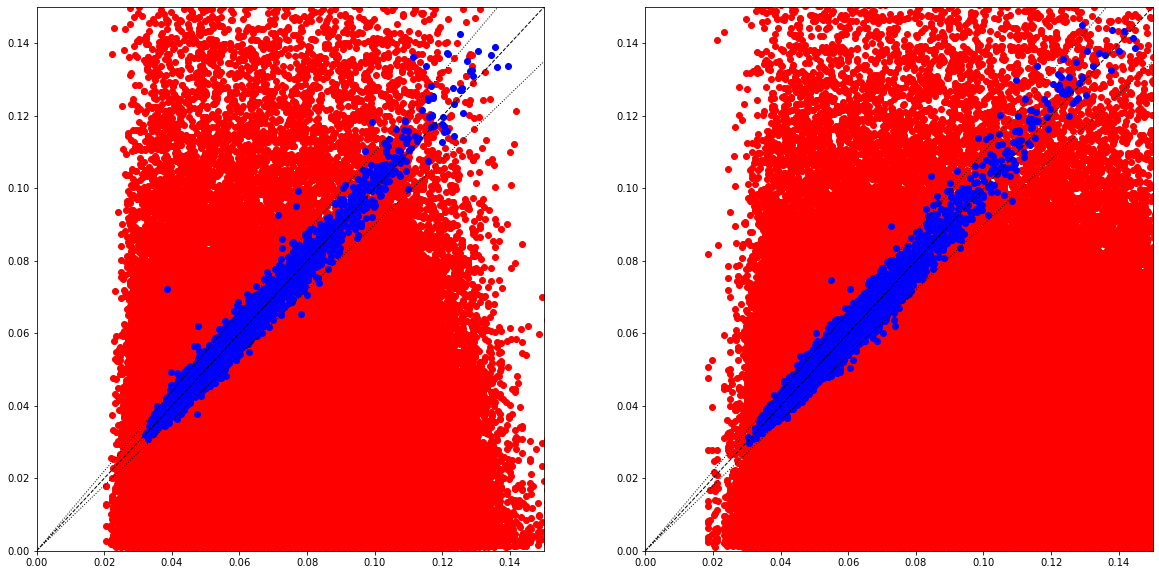

In [30]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_bkg_test[ "RPId1" ] == 23 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg_test[ "RPId1" ] == 123 ) & ( y_bkg_pred == 0 )
    msk_sig_1 = ( df_signal_test[ "RPId1" ] == 23 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal_test[ "RPId1" ] == 123 ) & ( y_sig_pred == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_bkg_test[ "Arm" ] == 0 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg_test[ "Arm" ] == 1 ) & ( y_bkg_pred == 0 )
    msk_sig_1 = ( df_signal_test[ "Arm" ] == 0 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal_test[ "Arm" ] == 1 ) & ( y_sig_pred == 1 )
    
axes[0].plot( df_bkg_test[ "Xi" ][ msk_bkg_1 ], df_bkg_test[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_signal_test[ "Xi" ][ msk_sig_1 ], df_signal_test[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_bkg_test[ "Xi" ][ msk_bkg_2 ], df_bkg_test[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_signal_test[ "Xi" ][ msk_sig_2 ], df_signal_test[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(0.0, 0.15)

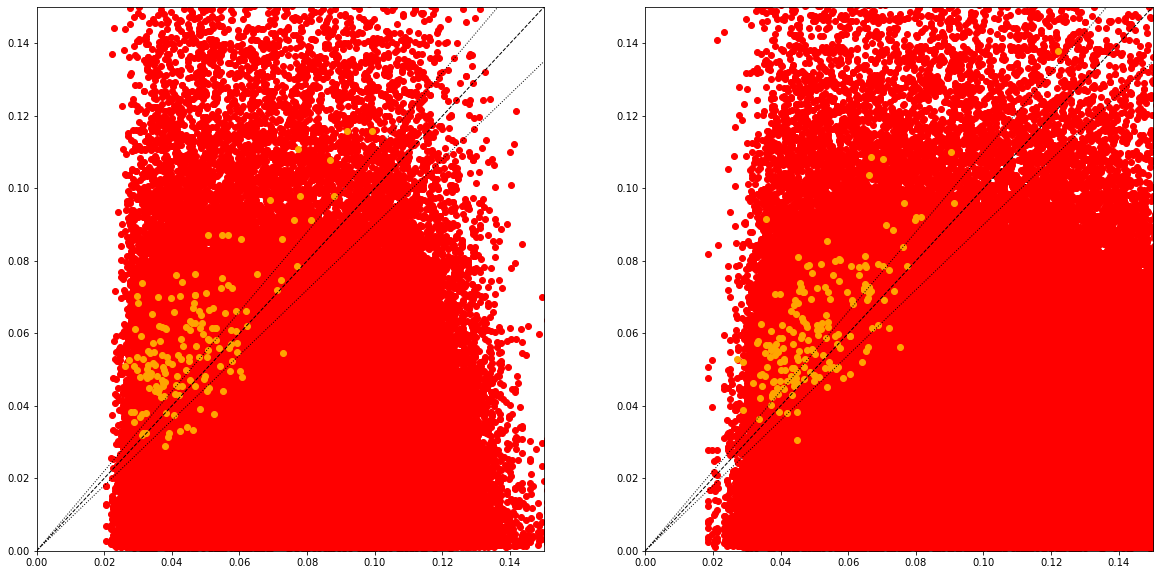

In [31]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_bkgerr_1 = None
msk_bkgerr_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_bkg_test[ "RPId1" ] == 23 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg_test[ "RPId1" ] == 123 ) & ( y_bkg_pred == 0 )
    msk_bkgerr_1 = ( df_bkg_test[ "RPId1" ] == 23 ) & ( y_bkg_pred == 1 )
    msk_bkgerr_2 = ( df_bkg_test[ "RPId1" ] == 123 ) & ( y_bkg_pred == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_bkg_test[ "Arm" ] == 0 ) & ( y_bkg_pred == 0 )
    msk_bkg_2 = ( df_bkg_test[ "Arm" ] == 1 ) & ( y_bkg_pred == 0 )
    msk_bkgerr_1 = ( df_bkg_test[ "Arm" ] == 0 ) & ( y_bkg_pred == 1 )
    msk_bkgerr_2 = ( df_bkg_test[ "Arm" ] == 1 ) & ( y_bkg_pred == 1 )
    
axes[0].plot( df_bkg_test[ "Xi" ][ msk_bkg_1 ], df_bkg_test[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_bkg_test[ "Xi" ][ msk_bkgerr_1 ], df_bkg_test[ "XiMuMuPlus" ][ msk_bkgerr_1 ], 'o', color='orange' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_bkg_test[ "Xi" ][ msk_bkg_2 ], df_bkg_test[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_bkg_test[ "Xi" ][ msk_bkgerr_2 ], df_bkg_test[ "XiMuMuMinus" ][ msk_bkgerr_2 ], 'o', color='orange' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(0.0, 0.15)

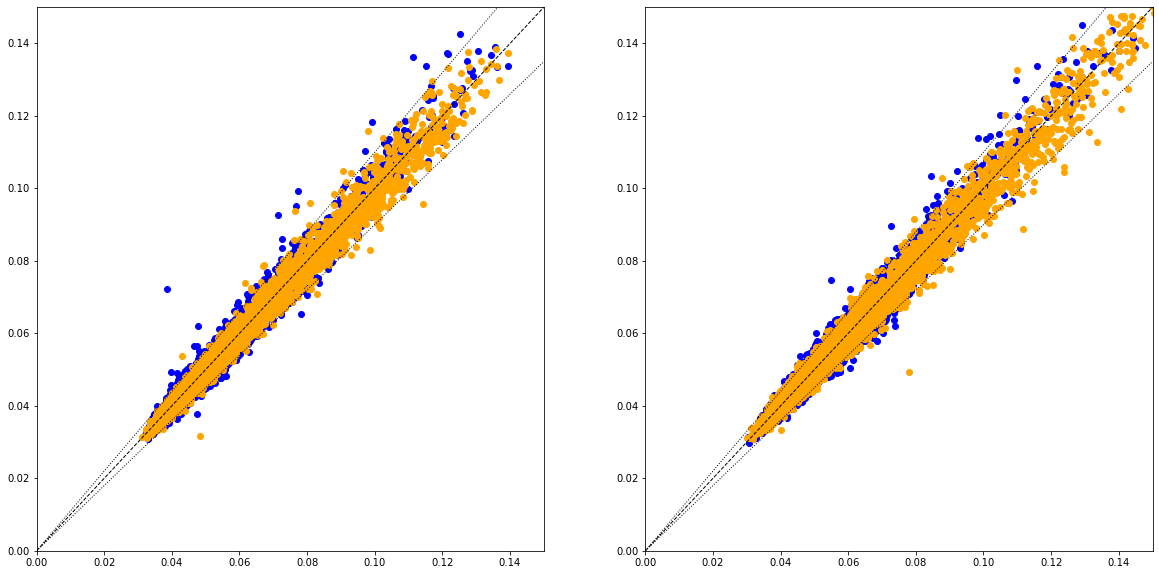

In [32]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_sigerr_1 = None
msk_sigerr_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_sigerr_1 = ( df_signal_test[ "RPId1" ] == 23 ) & ( y_sig_pred == 0 )
    msk_sigerr_2 = ( df_signal_test[ "RPId1" ] == 123 ) & ( y_sig_pred == 0 )
    msk_sig_1 = ( df_signal_test[ "RPId1" ] == 23 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal_test[ "RPId1" ] == 123 ) & ( y_sig_pred == 1 )
elif proton_selection == "MultiRP":
    msk_sigerr_1 = ( df_signal_test[ "Arm" ] == 0 ) & ( y_sig_pred == 0 )
    msk_sigerr_2 = ( df_signal_test[ "Arm" ] == 1 ) & ( y_sig_pred == 0 )
    msk_sig_1 = ( df_signal_test[ "Arm" ] == 0 ) & ( y_sig_pred == 1 )
    msk_sig_2 = ( df_signal_test[ "Arm" ] == 1 ) & ( y_sig_pred == 1 )

axes[0].plot( df_signal_test[ "Xi" ][ msk_sig_1 ], df_signal_test[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( df_signal_test[ "Xi" ][ msk_sigerr_1 ], df_signal_test[ "XiMuMuPlus" ][ msk_sigerr_1 ], 'o', color='orange' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_signal_test[ "Xi" ][ msk_sig_2 ], df_signal_test[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( df_signal_test[ "Xi" ][ msk_sigerr_2 ], df_signal_test[ "XiMuMuMinus" ][ msk_sigerr_2 ], 'o', color='orange' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

## Data

In [33]:
# run_tables = True

label = "data"

fileNames_data = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017E-PreSel_0.h5',
    'output/output-UL2017E-PreSel_1.h5',
    'output/output-UL2017F1-PreSel.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_data = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data_, df_data_ = get_data( fileNames_data )
        df_data_ = process_data( df_data_, proton_selection=proton_selection, min_mass = 110., within_aperture=True )
        
        store_[ "counts" ] = df_counts_data_
        store_[ "df" ] = df_data_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_data = store_[ "counts" ]
    df_data = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:27:23
Total time elapsed: 0


In [34]:
df_counts_data

All        43455978
Muon         422801
Vertex       389118
Protons      315084
dtype: int64

In [35]:
df_data

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh
3,297227,55,38079656,0,120.0,1,1,103,123,4.577393,...,0.132612,0.001953,0.048346,0.048346,2017B,True,2.422,24.620,-9.698,4.698
6,297227,56,38791640,0,120.0,1,1,103,123,8.585938,...,0.058782,0.002211,0.062855,0.062855,2017B,True,2.422,24.620,-9.698,4.698
39,297227,71,50687028,0,120.0,1,0,3,23,5.214844,...,0.016921,0.010428,0.041786,0.010428,2017B,True,1.995,24.334,-10.098,4.298
48,297227,73,52238048,0,120.0,1,1,103,123,5.372803,...,0.060892,0.014483,0.008333,0.008333,2017B,True,2.422,24.620,-9.698,4.698
51,297227,74,52411720,0,120.0,1,1,103,123,4.895752,...,0.308182,0.016115,0.019881,0.019881,2017B,True,2.422,24.620,-9.698,4.698
61,297227,75,53449356,0,120.0,1,0,3,23,12.326172,...,0.023202,0.019344,0.007848,0.019344,2017B,True,1.995,24.334,-10.098,4.298
70,297227,76,54126336,0,120.0,1,1,103,123,3.238647,...,0.145185,0.049092,0.006129,0.006129,2017B,True,2.422,24.620,-9.698,4.698
73,297227,78,56185408,0,120.0,1,1,103,123,5.210449,...,0.141610,0.014498,0.005325,0.005325,2017B,True,2.422,24.620,-9.698,4.698
109,297227,94,68360752,0,120.0,1,0,3,23,5.153076,...,0.410358,0.090327,0.001269,0.090327,2017B,True,1.995,24.334,-10.098,4.298
110,297227,94,68360752,0,120.0,1,1,103,123,6.544922,...,0.410358,0.090327,0.001269,0.001269,2017B,True,2.422,24.620,-9.698,4.698


In [36]:
X_data = df_data[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_data[:20]

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
3,0.067306,63.340645,62.493637,123.616516,27,0.132612,0.048346
6,0.102869,65.270454,65.022888,152.786011,29,0.058782,0.062855
39,0.039614,126.357605,113.611771,270.992401,27,0.016921,0.010428
48,0.052213,86.516212,56.114479,138.904510,10,0.060892,0.008333
51,0.045295,111.228539,96.216682,211.304825,37,0.308182,0.019881
61,0.104492,74.069061,62.750038,159.699677,53,0.023202,0.019344
70,0.055042,75.266441,69.694183,223.032425,59,0.145185,0.006129
73,0.056894,57.649437,56.255272,111.417343,25,0.141610,0.005325
109,0.052344,82.481186,53.035610,110.397728,63,0.410358,0.090327
110,0.137955,82.481186,53.035610,110.397728,63,0.410358,0.001269


In [37]:
X_data_scaled = None
y_data_proba = None
y_data = None

if use_keras:
    X_data_scaled = scaler.transform( X_data )
    print( X_data_scaled )
   
    y_data_proba = clf.predict( X_data_scaled )
    y_data_proba = y_data_proba.flatten()
    y_data = ( y_data_proba >= prob_cut ).astype( "int32" )
    y_data = y_data.flatten()
else:
    y_data_proba = clf.predict_proba( X_data )[:,1]
    #y_data = clf.predict( X_data )
    y_data = ( y_data_proba >= prob_cut ).astype( "int32" )

print ( y_data_proba )
print ( y_data )

[[-0.48791324 -0.57552644 -0.28252644 ... -0.46081006  0.21452022
   0.87742858]
 [ 0.63849671 -0.53148926 -0.19935866 ... -0.37053025 -0.29173443
   1.40912703]
 [-1.36500757  0.86248563  1.39835916 ... -0.46081006 -0.57877406
  -0.51215207]
 ...
 [-0.87686426 -0.74873082 -0.62835634 ... -1.45388801 -0.61153751
  -0.35809937]
 [ 1.1215944  -0.52436967 -0.40721164 ...  1.25450639  0.65660675
  -0.74862514]
 [ 0.96611278  0.57900775 -0.17975548 ...  0.39684817  0.04689659
  -0.18229149]]
[3.9893091e-03 8.0403686e-04 6.7523122e-04 ... 1.3055205e-03 2.0743568e-10
 3.8372825e-08]
[0 0 0 ... 0 0 0]


(0.0, 0.15)

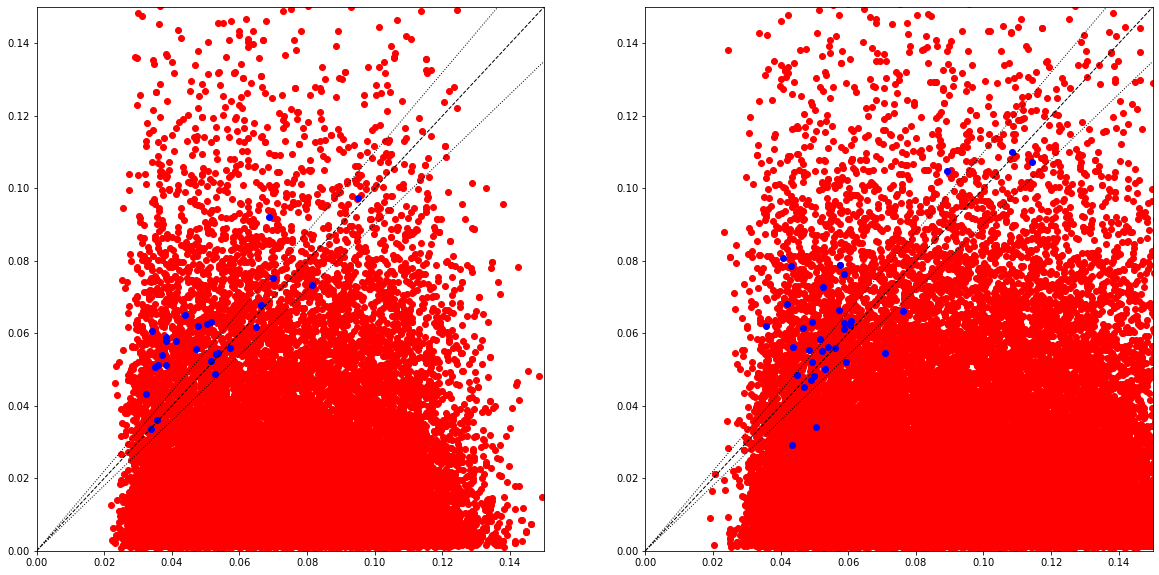

In [38]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

msk_bkg_1 = None
msk_bkg_2 = None
msk_sig_1 = None
msk_sig_2 = None
if proton_selection == "SingleRP":
    msk_bkg_1 = ( df_data[ "RPId1" ] == 23 ) & ( y_data == 0 )
    msk_bkg_2 = ( df_data[ "RPId1" ] == 123 ) & ( y_data == 0 )
    msk_sig_1 = ( df_data[ "RPId1" ] == 23 ) & ( y_data == 1 )
    msk_sig_2 = ( df_data[ "RPId1" ] == 123 ) & ( y_data == 1 )
elif proton_selection == "MultiRP":
    msk_bkg_1 = ( df_data[ "Arm" ] == 0 ) & ( y_data == 0 )
    msk_bkg_2 = ( df_data[ "Arm" ] == 1 ) & ( y_data == 0 )
    msk_sig_1 = ( df_data[ "Arm" ] == 0 ) & ( y_data == 1 )
    msk_sig_2 = ( df_data[ "Arm" ] == 1 ) & ( y_data == 1 )

axes[0].plot( df_data[ "Xi" ][ msk_bkg_1 ], df_data[ "XiMuMuPlus" ][ msk_bkg_1 ], 'ro' )
axes[0].plot( df_data[ "Xi" ][ msk_sig_1 ], df_data[ "XiMuMuPlus" ][ msk_sig_1 ], 'bo' )
axes[0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0].set_xlim(0.,0.15)
axes[0].set_ylim(0.,0.15)
axes[1].plot( df_data[ "Xi" ][ msk_bkg_2 ], df_data[ "XiMuMuMinus" ][ msk_bkg_2 ], 'ro' )
axes[1].plot( df_data[ "Xi" ][ msk_sig_2 ], df_data[ "XiMuMuMinus" ][ msk_sig_2 ], 'bo' )
axes[1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1].set_xlim(0.,0.15)
axes[1].set_ylim(0.,0.15)

(array([59.60729463, 60.77606512, 62.38311091, 58.43853691, 59.89946546,
        53.90953461, 61.50657799, 52.88686051, 49.96493451, 59.89944803,
        53.47127683, 56.10094645, 53.32518045, 52.30250575, 58.73067831,
        59.60732499, 54.20169566, 56.97759007, 53.03292594, 52.88682972,
        55.6627874 , 52.74073351, 45.58201899, 49.08832814, 52.30256664,
        49.52661679, 45.7281152 , 43.09848368, 44.55934549, 43.6827682 ,
        48.94223193, 43.09848368, 50.40319407, 49.08832814, 40.17645904,
        45.43602856, 49.08832814, 47.62736599, 45.43602856, 48.06554273,
        42.66019402, 44.85164234, 37.10835214, 45.87431823, 44.41335268,
        43.68266649, 39.44606981, 41.63732425, 42.95238713, 38.13120082]),
 array([0.    , 0.0004, 0.0008, 0.0012, 0.0016, 0.002 , 0.0024, 0.0028,
        0.0032, 0.0036, 0.004 , 0.0044, 0.0048, 0.0052, 0.0056, 0.006 ,
        0.0064, 0.0068, 0.0072, 0.0076, 0.008 , 0.0084, 0.0088, 0.0092,
        0.0096, 0.01  , 0.0104, 0.0108, 0.0112, 0.01

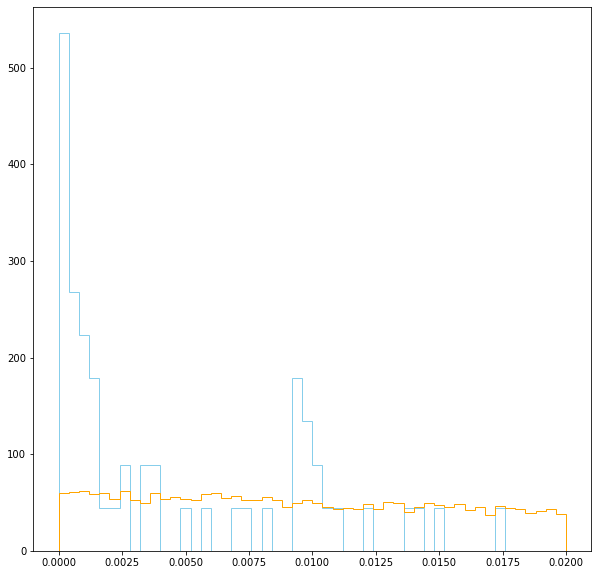

In [39]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data[ "Acopl" ][ y_data == 1 ], histtype='step', color='skyblue', bins=50, range=(0.,0.02), density=True )
plt.hist( df_data[ "Acopl" ][ y_data == 0 ], histtype='step', color='orange', bins=50, range=(0.,0.02), density=True )

(array([0.00288261, 0.00248652, 0.00347673, 0.00556717, 0.00671141,
        0.00822973, 0.00895588, 0.01003411, 0.01113434, 0.01342282,
        0.01370888, 0.01586533, 0.01575531, 0.01758169, 0.01841787,
        0.02077236, 0.02127847, 0.02235669, 0.02176257, 0.02545935,
        0.02314886, 0.02449114, 0.02310485, 0.02435912, 0.02600946,
        0.02563538, 0.02484322, 0.02589944, 0.02495324, 0.02592144,
        0.02567939, 0.02732974, 0.02633953, 0.02633953, 0.02530531,
        0.02616349, 0.02515128, 0.02466718, 0.02367697, 0.02389702,
        0.02312686, 0.02431511, 0.02180658, 0.02312686, 0.02149851,
        0.0209484 , 0.02044229, 0.02011222, 0.01821983, 0.0376279 ]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 [<matplotlib.patches.Polygon

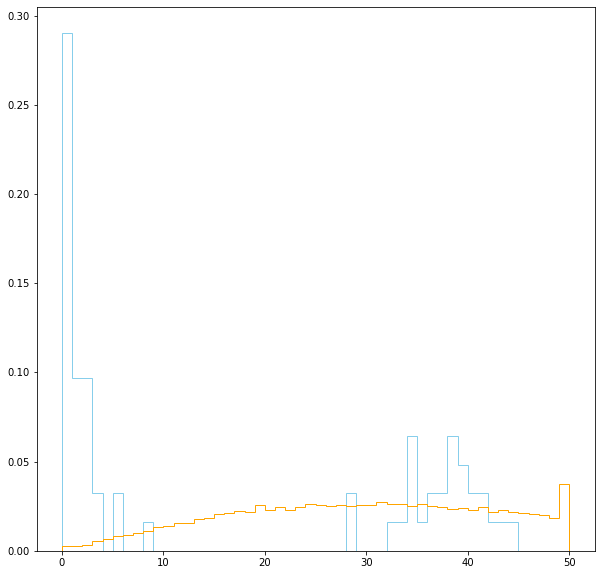

In [40]:
fig = plt.figure( figsize=(10,10) )
plt.hist( df_data[ "ExtraPfCands" ][ y_data == 1 ], histtype='step', color='skyblue', bins=50, range=(0,50), density=True )
plt.hist( df_data[ "ExtraPfCands" ][ y_data == 0 ], histtype='step', color='orange', bins=50, range=(0,50), density=True )

In [41]:
#vars_ = ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu']
#df_data[ "category" ] = clf.predict( df_data[ vars_ ] ).astype("int32")
#df_data[ "probability" ] = clf.predict_proba( df_data[ vars_ ] )[:,1]
df_data[ "category" ] = y_data
df_data[ "probability" ] = y_data_proba
df_data[:20]

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh,category,probability
3,297227,55,38079656,0,120.0,1,1,103,123,4.577393,...,0.048346,0.048346,2017B,True,2.422,24.620,-9.698,4.698,0,3.989309e-03
6,297227,56,38791640,0,120.0,1,1,103,123,8.585938,...,0.062855,0.062855,2017B,True,2.422,24.620,-9.698,4.698,0,8.040369e-04
39,297227,71,50687028,0,120.0,1,0,3,23,5.214844,...,0.041786,0.010428,2017B,True,1.995,24.334,-10.098,4.298,0,6.752312e-04
48,297227,73,52238048,0,120.0,1,1,103,123,5.372803,...,0.008333,0.008333,2017B,True,2.422,24.620,-9.698,4.698,0,3.168208e-05
51,297227,74,52411720,0,120.0,1,1,103,123,4.895752,...,0.019881,0.019881,2017B,True,2.422,24.620,-9.698,4.698,0,2.676088e-05
61,297227,75,53449356,0,120.0,1,0,3,23,12.326172,...,0.007848,0.019344,2017B,True,1.995,24.334,-10.098,4.298,0,1.217404e-05
70,297227,76,54126336,0,120.0,1,1,103,123,3.238647,...,0.006129,0.006129,2017B,True,2.422,24.620,-9.698,4.698,0,4.862785e-06
73,297227,78,56185408,0,120.0,1,1,103,123,5.210449,...,0.005325,0.005325,2017B,True,2.422,24.620,-9.698,4.698,0,2.530708e-06
109,297227,94,68360752,0,120.0,1,0,3,23,5.153076,...,0.001269,0.090327,2017B,True,1.995,24.334,-10.098,4.298,0,5.889535e-04
110,297227,94,68360752,0,120.0,1,1,103,123,6.544922,...,0.001269,0.001269,2017B,True,2.422,24.620,-9.698,4.698,0,4.441398e-14


### Plot variables

In [42]:
test_sample_ratio = 0.40
df_bkg_test[ "norm" ] = ( ( 1. / resample_factor) * ( 1. / test_sample_ratio ) )
df_bkg_test[ "xi_ratio" ] = ( 1. - df_bkg_test[ "Xi" ] / df_bkg_test[ "XiMuMu" ] )
df_data[ "xi_ratio" ] = ( 1. - df_data[ "Xi" ] / df_data[ "XiMuMu" ] )

<ipython-input-42-6d551c5e067c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_bkg_test[ "norm" ] = ( ( 1. / resample_factor) * ( 1. / test_sample_ratio ) )
<ipython-input-42-6d551c5e067c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_bkg_test[ "xi_ratio" ] = ( 1. - df_bkg_test[ "Xi" ] / df_bkg_test[ "XiMuMu" ] )


In [43]:
def plot_variable( var, hist_bins, hist_range, proton_selection, df_data, weights_data=None, df_bkg=None, weights_bkg=None ):

    fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
    
    msk_data_1 = None
    msk_data_2 = None
    if proton_selection == "SingleRP":
        msk_data_1 = ( df_data[ "RPId1" ] == 23 )
        msk_data_2 = ( df_data[ "RPId1" ] == 123 )
    elif proton_selection == "MultiRP":
        msk_data_1 = ( df_data[ "Arm" ] == 0 )
        msk_data_2 = ( df_data[ "Arm" ] == 1 )

    w_data_1 = None
    w_data_2 = None
    if not(weights_data is None) and len(weights_data) > 0:
        w_data_1 = weights_data[ msk_data_1 ]
        w_data_2 = weights_data[ msk_data_2 ]
    else:
        w_data_1 = np.ones( df_data[ msk_data_1 ].shape[0] )
        w_data_2 = np.ones( df_data[ msk_data_2 ].shape[0] )
    print ( np.array( w_data_1 ) )
    print ( np.array( w_data_2 ) )
    
    counts_1, bin_edges_1 = np.histogram( df_data[ var ][ msk_data_1 ],
                                          weights=w_data_1,
                                          bins=hist_bins, range=hist_range )
    counts_1_w2, _ = np.histogram( df_data[ var ][ msk_data_1 ],
                                   weights=( w_data_1 ** 2),
                                   bins=hist_bins, range=hist_range )
    errors_1 = np.sqrt( counts_1_w2 )
    bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
    axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')
    
    counts_2, bin_edges_2 = np.histogram( df_data[ var ][ msk_data_2 ],
                                          weights=w_data_2,
                                          bins=hist_bins, range=hist_range )
    counts_2_w2, _ = np.histogram( df_data[ var ][ msk_data_2 ],
                                   weights=( w_data_2 ** 2),
                                   bins=hist_bins, range=hist_range )
    errors_2 = np.sqrt( counts_2_w2 )
    bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
    axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')
    
    idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
    y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_]
    y_max += np.max( [ 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_], 0.20*y_max ] )
    print ( "y max. = {}".format(y_max) )

    msk_bkg_1 = None
    msk_bkg_2 = None
    if proton_selection == "SingleRP":
        msk_bkg_1 = ( df_bkg[ "RPId1" ] == 23 )
        msk_bkg_2 = ( df_bkg[ "RPId1" ] == 123 )
    elif proton_selection == "MultiRP":
        msk_bkg_1 = ( df_bkg[ "Arm" ] == 0 )
        msk_bkg_2 = ( df_bkg[ "Arm" ] == 1 )

    w_bkg_1 = None
    w_bkg_2 = None
    if not(weights_bkg is None) and len(weights_bkg) > 0:
        w_bkg_1 = weights_bkg[ msk_bkg_1 ]
        w_bkg_2 = weights_bkg[ msk_bkg_2 ]
    else:
        w_bkg_1 = np.ones( df_bkg[ msk_bkg_1 ].shape[0] )
        w_bkg_2 = np.ones( df_bkg[ msk_bkg_2 ].shape[0] )
    print ( np.array( w_bkg_1 ) )
    print ( np.array( w_bkg_2 ) )

    axes[0].hist( df_bkg[ var ][ msk_bkg_1 ],
                  weights=w_bkg_1,
                  bins=hist_bins, range=hist_range )
    axes[1].hist( df_bkg[ var ][ msk_bkg_2 ],
                  weights=w_bkg_2,
                  bins=hist_bins, range=hist_range )

    axes[0].set_ylim( top=y_max )
    axes[1].set_ylim( top=y_max )
    #axes[0].set_yscale('log')
    #axes[1].set_yscale('log')

    return (fig, axes)

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
y max. = 42862.8
[0.125 0.125 0.125 ... 0.125 0.125 0.125]
[0.125 0.125 0.125 ... 0.125 0.125 0.125]


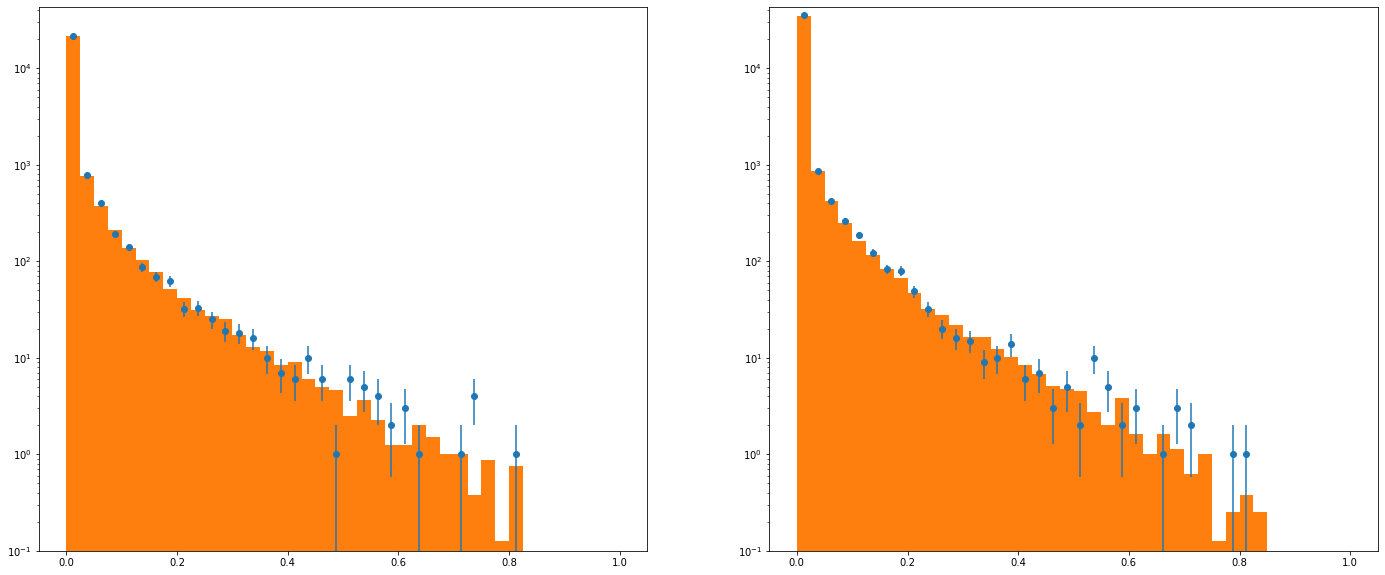

In [44]:
fig, axes = plot_variable( "probability", 40, (0.,1.), proton_selection, df_data, weights_data=None, df_bkg=df_bkg_test, weights_bkg=df_bkg_test["norm"] )
#axes[0].set_ylim( top=50. )
#axes[1].set_ylim( top=50. )
axes[0].set_ylim( bottom=0.1 )
axes[1].set_ylim( bottom=0.1 )
axes[0].set_yscale('log')
axes[1].set_yscale('log')

### Plot events classified as signal

In [45]:
prob_cut_sel = prob_cut
#prob_cut_sel = 0.30
print ( prob_cut_sel )
msk_data = ( df_data[ "probability" ] >= prob_cut_sel )
msk_bkg  = ( df_bkg_test[ "probability" ] >= prob_cut_sel )

0.48927808


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y max. = 15.0
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.1

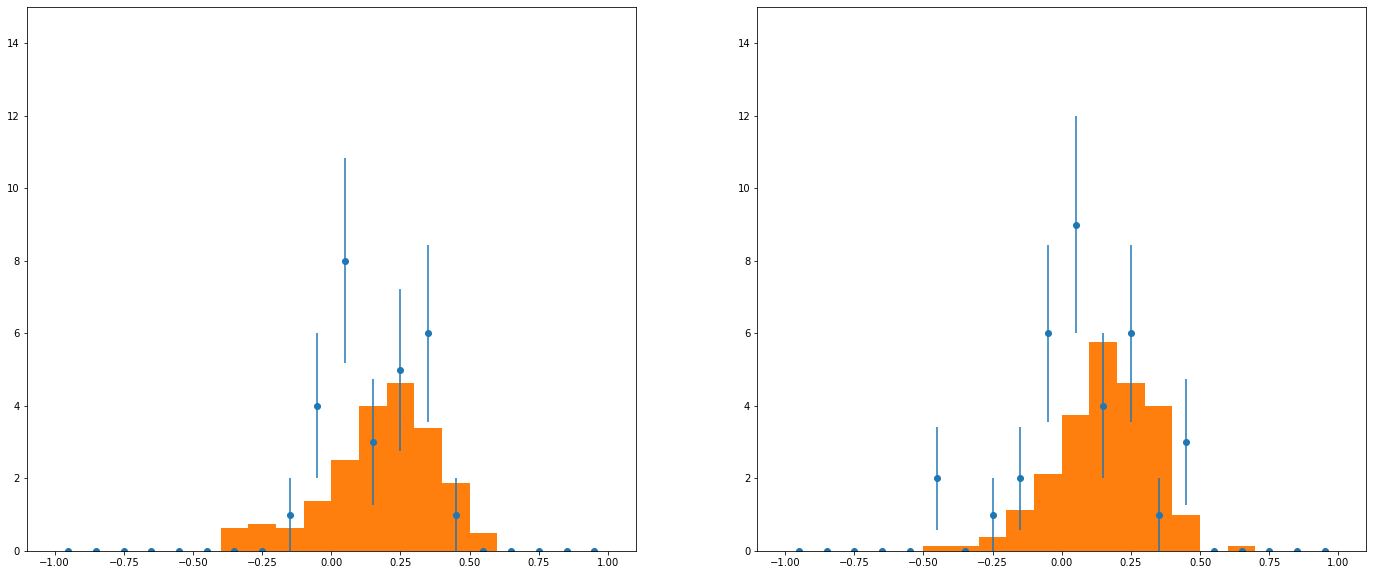

In [46]:
var_ = "xi_ratio"
bins_ = 20
range_ = (-1.,1.)
fig, axes = plot_variable( var_, bins_, range_, proton_selection,
                           df_data[ msk_data ], weights_data=None,
                           df_bkg=df_bkg_test[ msk_bkg ], weights_bkg=df_bkg_test["norm"][ msk_bkg ] )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y max. = 36.19803902718557
[0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125
 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.

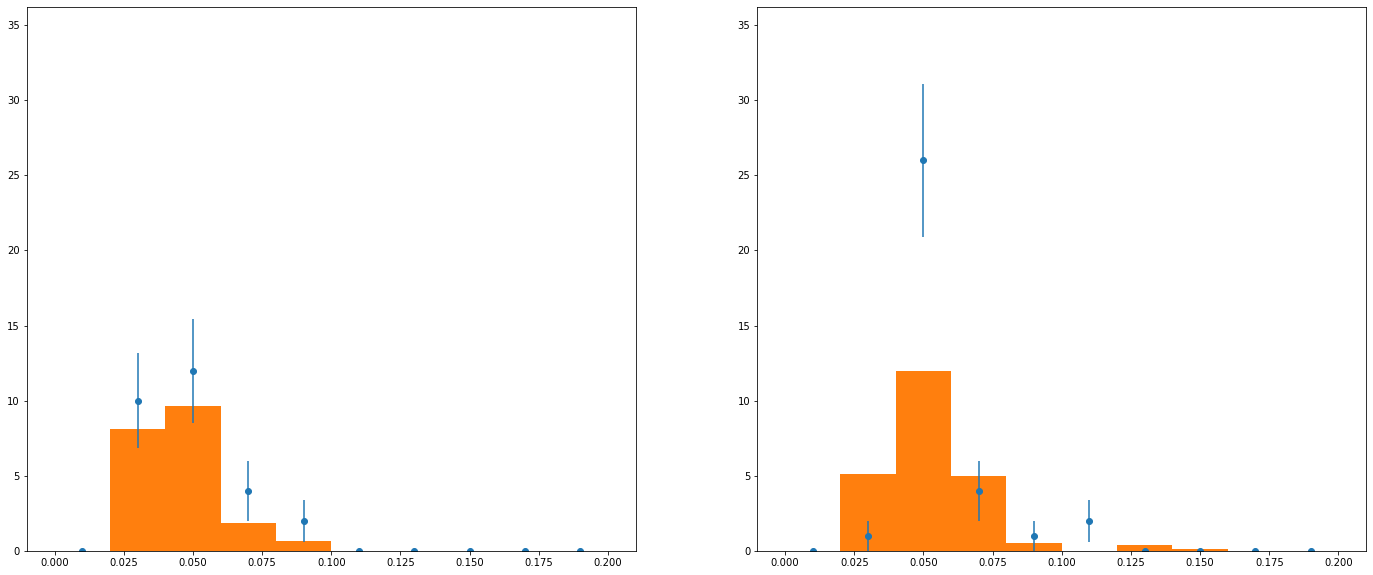

In [47]:
var_ = "Xi"
bins_ = 10
range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

#var_ = "ThY"
#bins_ = 10
#range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

#var_ = "Muon0Pt"
#bins_ = 10
#range_ = (50.,200.)

#var_ = "InvMass"
#bins_ = 10
#range_ = (110.,500.)

#var_ = "Acopl"
#bins_ = 10
#range_ = (0.,0.01)

#var_ = "ExtraPfCands"
#bins_ = 20
#range_ = (0,20)

fig, axes = plot_variable( var_, bins_, range_, proton_selection,
                           df_data[ msk_data ], weights_data=None,
                           df_bkg=df_bkg_test[ msk_bkg ], weights_bkg=df_bkg_test["norm"][ msk_bkg ] )

### References